In [258]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import tensorflow_datasets as tfds
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh 
from sklearn.decomposition import IncrementalPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics,datasets
from sklearn.datasets import make_swiss_roll
from sklearn import manifold
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
%matplotlib inline

## Loading Mnist data

In [259]:

d0 = pd.read_csv('mnist_784.csv')
df = pd.DataFrame(data=d0)
print(df.head(5)) # print first five rows of d0.
print(df.shape)


   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel782  pixel783  pixel784  class  
0         0         0

In [260]:
sorted(df["class"].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [261]:
# save the labels into a variable l.
y = df['class']

# Drop the label feature and store the pixel data in d.
x = df.drop("class",axis=1)

In [262]:
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


In [263]:
digits = datasets.load_digits()


## Displaying each digit in Mnist:

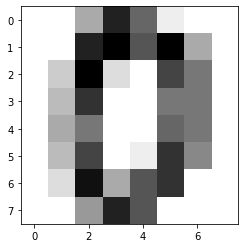

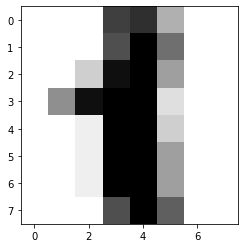

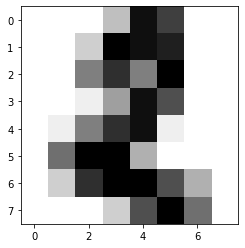

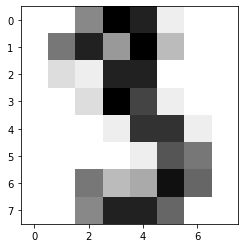

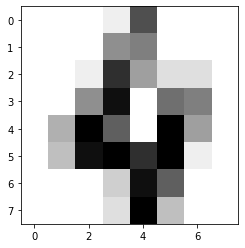

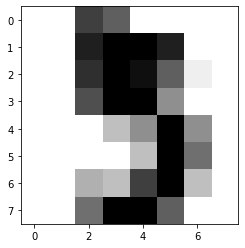

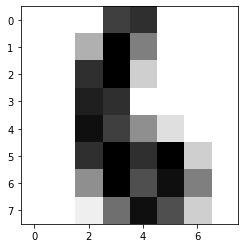

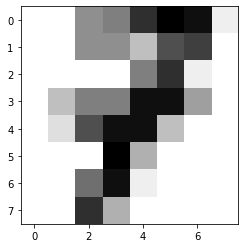

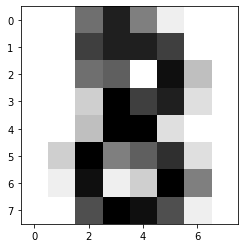

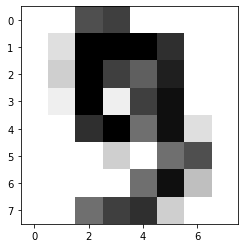

In [264]:
for i in range(10):
    plt.imshow(digits.images[i],cmap='binary')
    plt.show()

## Normailising the data

In [265]:
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(70000, 784)


find the co-variance matrix which is : A^T * A

In [266]:

sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


the parameter 'eigvals' is defined (low value to heigh value) 
eigh function will return the eigen values in asending order
this code generates only the top 2 (782 and 783)(index) eigenvalues.

In [267]:


values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


### projecting the original data sample on the 2-D plane 

In [268]:

#formed by two principal eigen vectors by vector-vector multiplication.


new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 70000)  =  (2, 70000)


### 1st and 2nd Principal component

In [269]:

# appending label to the 2d projected data(vertical stack)
new_coordinates = np.vstack((new_coordinates, y)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -4.929711      -0.891720    5.0
1      -7.517560       8.813530    0.0
2       9.824461       2.204835    4.0
3      -4.029669      -6.534627    1.0
4       3.278848      -5.251618    9.0


C:\Users\duvvu\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


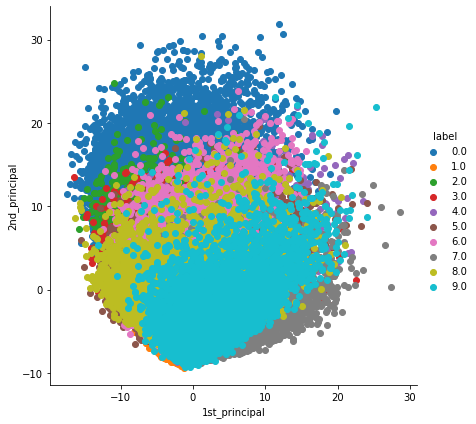

In [270]:

sns.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## PCA using scikit learn

In [271]:
# initializing the pca

pca = PCA(n_components = 2)

In [272]:
# configuring the parameteres
# the number of components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)
print("Variance Ratio :", pca.explained_variance_ratio_)

shape of pca_reduced.shape =  (70000, 2)
Variance Ratio : [0.05642719 0.04041226]


In [273]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, y)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
print(pca_df.head())


   1st_principal  2nd_principal  label
0      -0.891715      -4.928819    5.0
1       8.813552      -7.517704    0.0
2       2.204681       9.823568    4.0
3      -6.534601      -4.028987    1.0
4      -5.251577       3.278937    9.0


C:\Users\duvvu\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


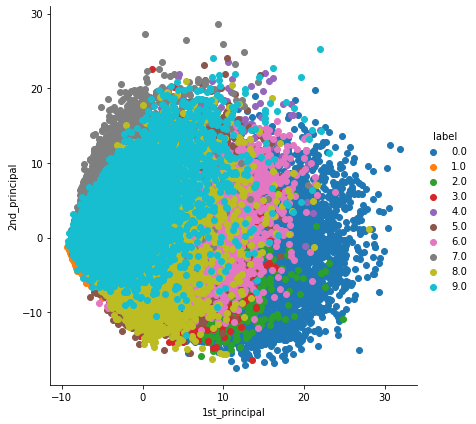

In [274]:
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [275]:
print(pca_data.shape)

(70000, 3)


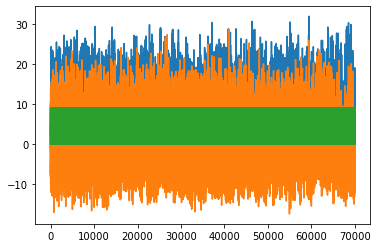

In [276]:
plt.plot(pca_data)
plt.show()

### 1-D view

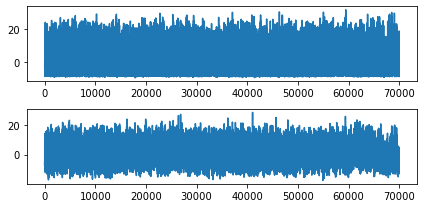

In [277]:

x1 = pca_data[:, 0]
x2 = pca_data[:, 1]
fig, axes = plt.subplots(2, 1, figsize=(6, 3))

axes[0].plot(x1);
axes[1].plot(x2);

# plt.show()
plt.tight_layout()


# In[34]:





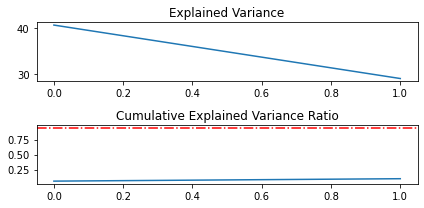

In [278]:

# Explained Variance / Variance Ratio
fig, axes = plt.subplots(2, 1, figsize=(6, 3))

axes[0].plot(pca.explained_variance_);
axes[0].set_title('Explained Variance')

axes[1].plot(np.cumsum(pca.explained_variance_ratio_));
axes[1].axhline(y=0.95, c='r', ls='-.')
axes[1].set_title('Cumulative Explained Variance Ratio')

plt.tight_layout()


## Incremental PCA for dimensionality reduction

In [279]:
ipca = IncrementalPCA(n_components=154)
X_ipca = ipca.fit_transform(sample_data)
print(X_ipca.shape)

(70000, 154)


## Displaying original and Compressed digits

In [280]:

k = 23
sample = 1;
figure(2)
subplot(1,2,1)
imagesc(reshape(train_tilde(X_ipca,:),[28,28]));
axis on
title("Original image sample")
subplot(1,2,2)
imagesc(reshape(train_tilde_k(X_ipca,:),[28,28]));
axis off
title(sprintf("Reconstruction using %i eigenvectors",k))

SyntaxError: invalid syntax (Temp/ipykernel_6708/3376277567.py, line 5)

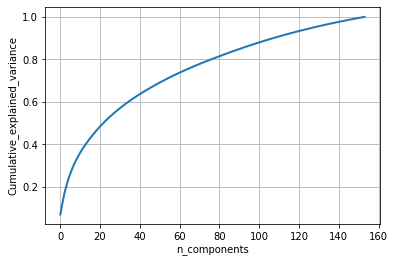

In [281]:


percentage_var_explained = ipca.explained_variance_ / np.sum(ipca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()



In [282]:
# Original data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
clf = DecisionTreeClassifier(max_depth=5, criterion = 'entropy', random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)




0.6909285714285714

In [235]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42):
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1343
           1       0.79      0.92      0.85      1600
           2       0.56      0.71      0.63      1380
           3       0.76      0.43      0.55      1433
           4       0.63      0.60      0.61      1295
           5       0.62      0.56      0.59      1273
           6       0.75      0.77      0.76      1396
           7       0.90      0.59      0.71      1503
           8       0.64      0.68      0.66      1357
           9       0.56      0.75      0.64      1420

    accuracy                           0.69     14000
   macro avg       0.70      0.69      0.68     14000
weighted avg       0.71      0.69      0.69     14000




In [232]:

# Compressed data 154
X_train, X_test, y_train, y_test = train_test_split(X_ipca, y, test_size = 0.20, random_state = 42)

clf = DecisionTreeClassifier(max_depth=5, criterion = 'entropy', random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6547857142857143

In [233]:

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42):
              precision    recall  f1-score   support

           0       0.80      0.68      0.74      1343
           1       0.95      0.91      0.93      1600
           2       0.59      0.70      0.64      1380
           3       0.61      0.71      0.65      1433
           4       0.57      0.59      0.58      1295
           5       0.45      0.48      0.47      1273
           6       0.76      0.82      0.79      1396
           7       0.72      0.74      0.73      1503
           8       0.67      0.28      0.40      1357
           9       0.47      0.57      0.52      1420

    accuracy                           0.65     14000
   macro avg       0.66      0.65      0.64     14000
weighted avg       0.67      0.65      0.65     14000




# Observations:

1. Good Accuracy for Original data with 784 dimensions compared to compressed data
2. Facing issues in displaying original and compressed digits

# Exercise-2

In [236]:

swiss_roll,color = make_swiss_roll(n_samples=100, noise=0.02, random_state=43)
swiss_roll
# Make it thinner
swiss_roll[:, 1] *= .5

print(swiss_roll.shape)


(100, 3)


In [237]:
color

array([ 5.79675272, 10.45270588,  5.9695692 ,  6.97989273,  7.79560194,
       12.80956907, 10.99014134,  9.81272267,  4.98583783, 11.62780375,
        8.43470521, 12.27150499,  7.1102516 ,  5.24851688, 12.88035999,
        6.79553819,  8.5293246 ,  7.69152803,  5.43491791, 12.65959449,
       12.71345195, 13.86823176,  8.34448083, 13.70822763,  8.91356256,
       11.02439512,  5.48993363, 13.16734391,  7.52100581,  7.18455369,
        4.76073384,  9.83195207,  9.19477914, 10.71006959, 13.93174574,
       13.27633371, 13.29037963,  9.66280705,  5.69274449,  6.41746887,
       13.69458145,  8.59495438, 12.86498327, 11.04751059, 10.63855549,
        7.30946927, 13.16403288,  6.66229422,  8.5238186 , 14.07658911,
       11.64645336,  8.90699397,  9.99651486,  8.58838065, 11.56408938,
        8.47473099, 11.02835836, 11.35417711, 10.45735542,  9.8020939 ,
        6.65466467,  6.58944168, 12.2120511 ,  7.44871095, 10.89469298,
        7.53621057,  6.07406562,  8.51959087,  7.63661038,  7.00

## plotting swiss roll

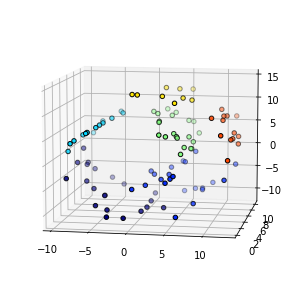

In [238]:


# Compute clustering
def agglomerativeClustering(kernel_name):
    ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(kernel_name)
    label = ward.labels_
    # Plot result
    fig = plt.figure()
    ax = p3.Axes3D(fig)
    ax.view_init(9, -80)
    for l in np.unique(label):
        ax.scatter(kernel_name[label == l, 0], kernel_name[label == l, 1], kernel_name[label == l, 2],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
    plt.show()
agglomerativeClustering(swiss_roll)

### Plotting projected data from original data:

Computing LLE embedding
Done. Reconstruction error: 5.29256e-06


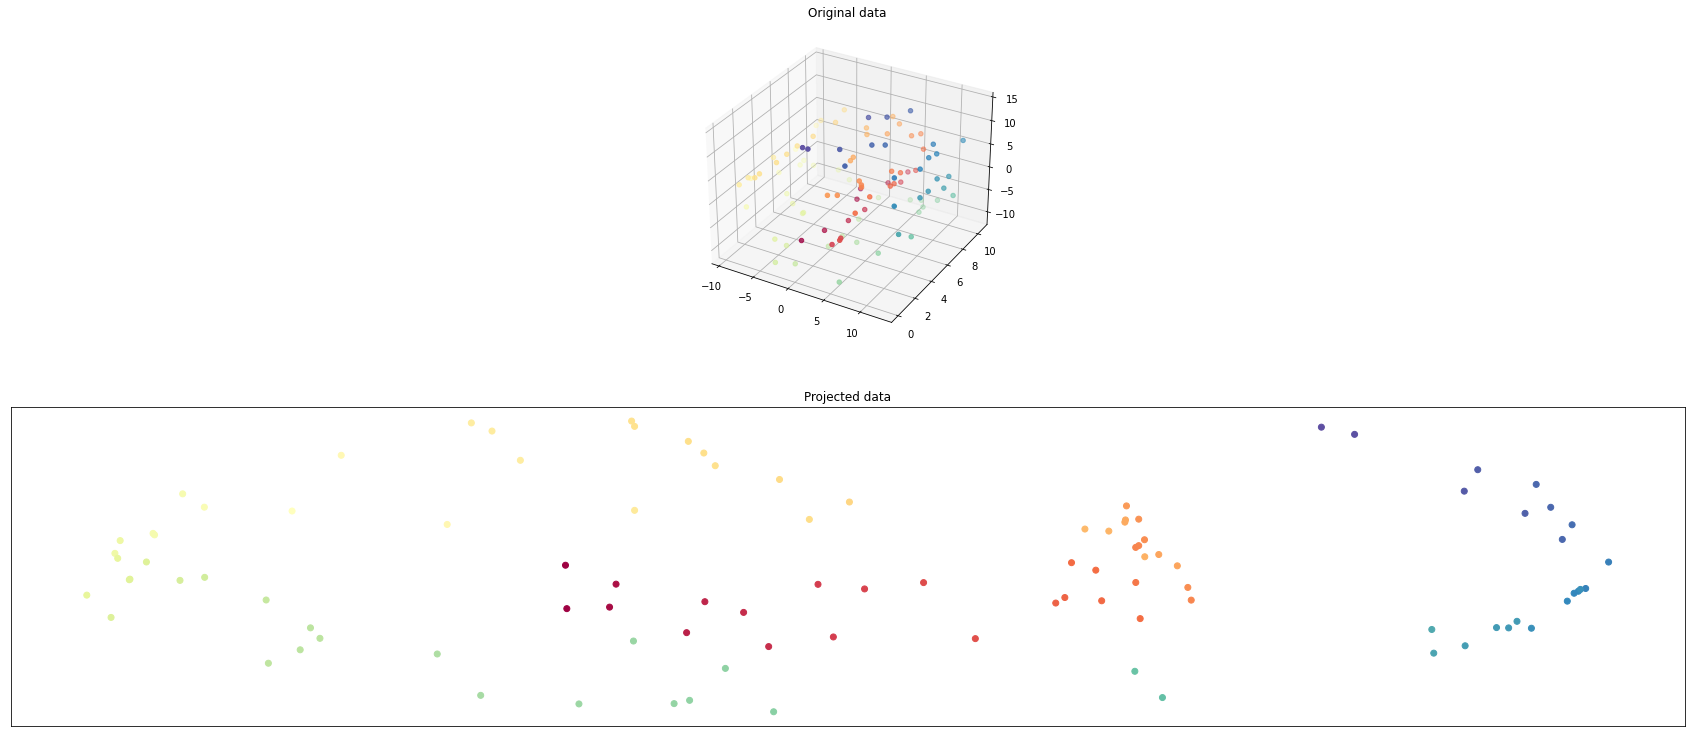

In [243]:


# ----------------------------------------------------------------------
# Locally linear embedding of the swiss roll



print("Computing LLE embedding")
X_r, err = manifold.locally_linear_embedding(swiss_roll, n_neighbors=12,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)

# ----------------------------------------------------------------------
# Plot result

fig = plt.figure(figsize=(30,20))

ax = fig.add_subplot(311, projection='3d')
ax.scatter(swiss_roll[:, 0], swiss_roll[:, 1], swiss_roll[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(312)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

### Kernel PCA: Linear,rbf and sigmoid:

In [244]:
l_pca = KernelPCA(n_components=2,kernel="linear",gamma=0.04)
l_pca_r = l_pca.fit_transform(swiss_roll)

In [245]:
rbf_pca = KernelPCA(n_components=2,kernel="rbf",gamma=0.04)
rbf_pca_r = rbf_pca.fit_transform(swiss_roll)

In [246]:
sigmoid_pca = KernelPCA(n_components=2,kernel="sigmoid",gamma=0.04)
sigmoid_pca_r = sigmoid_pca.fit_transform(swiss_roll)

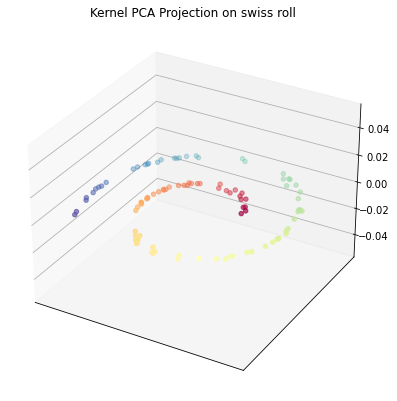

In [247]:
def plot_kernel_PCA(kernel_name):
    fig = plt.figure(figsize=(20,15))
    ax = fig.add_subplot(211, projection='3d')
    ax.set_title("Kernel PCA Projection on swiss roll")
    ax.scatter(kernel_name[:, 0], kernel_name[:, 1] ,c=color, cmap=plt.cm.Spectral)
    plt.axis('tight')
    plt.xticks([]), plt.yticks([])
    plt.show()
plot_kernel_PCA(l_pca_r)

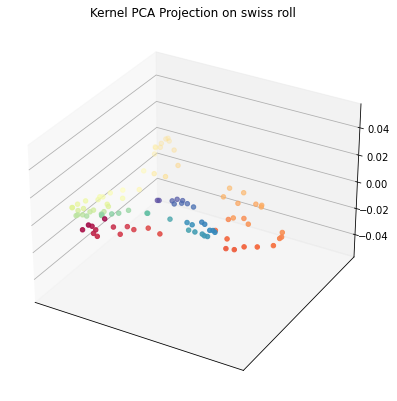

In [248]:
plot_kernel_PCA(rbf_pca_r)

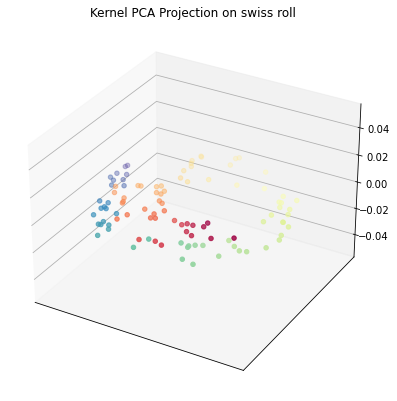

In [249]:
plot_kernel_PCA(sigmoid_pca_r)

#### From the above kernels, data is linearly seperable

In [254]:
clf = Pipeline([("kpca",KernelPCA(n_components=2)),("log_reg",LogisticRegression(max_iter=300))])

param_grid = [{"kpca__gamma": np.linspace(0.03,0.05,10),
              "kpca__kernel": ["linear","rbf","sigmoid"]
              }]

grid_search= GridSearchCV(clf,param_grid,cv=3)
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(swiss_roll)
y = ward.labels_


# In[19]:


grid_search.fit(swiss_roll, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=300))]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['linear', 'rbf', 'sigmoid']}])

## The above warnings are convergence which occured due to logistic regression solvers

In [255]:

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)
print("Best Estimator: ", grid_search.best_estimator_)


Best Parameters:  {'kpca__gamma': 0.03, 'kpca__kernel': 'linear'}
Best Score:  0.9797979797979798
Best Estimator:  Pipeline(steps=[('kpca', KernelPCA(gamma=0.03, n_components=2)),
                ('log_reg', LogisticRegression(max_iter=300))])


(100, 2)


Text(0.5, 1.0, 'Best parameters: linear kernel, gamma: 0.03')

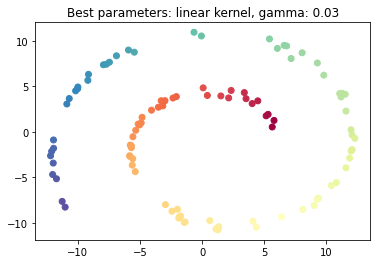

In [256]:
best_pca = KernelPCA(n_components = 2, gamma= 0.03, kernel= 'linear')

best_pca.fit(swiss_roll)

swiss_roll_reduced = best_pca.transform(swiss_roll)
print(swiss_roll_reduced.shape)

plt.scatter(swiss_roll_reduced[:, 0], swiss_roll_reduced[:, 1], c = color, cmap=plt.cm.Spectral)
plt.title("Best parameters: linear kernel, gamma: 0.03")


# Observations:

1. Kernel Linear performed well in the grid search
2. Logistic regression failed to converge at 100 and 200 iteration limit, however it worked well with max_iter=300